## Problem: Bias-Variance Tradeoff

In this problem, we ask you to compare the classification models we have studied till now i.e., logistic regression, KNN (n = 5), and Decision trees in terms of the high bias, high variance or balanced characteristics showcased by their learning curves on the Breast Cancer Dataset.

Learning curve is a plot which represents the trend of the training error and validation error with changing training set sizes averaged over multiple runs (cross-validated). Here, you are supposed to plot the learning curves for each model, and mention your inferences.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [2]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [3]:
###
#IMPORT LOGISTIC REGRESSION MODEL USING sklearn
from sklearn.linear_model import LogisticRegression
###

###
# Define the model (SHOULD NOT BE MORE THAN 1 LINE OF CODE)
model = LogisticRegression(max_iter=10000)
###

train_size, train_score, validation_score = learning_curve(estimator=model, X=X, y=y, cv=5)

train_score_m_LR = np.mean(train_score, axis=1)
validation_score_m_LR = np.mean(validation_score, axis=1)

print(train_score_m_LR)
print(validation_score_m_LR)

[1.         0.96870748 0.9672     0.96306818 0.96175824]
[0.84694923 0.93143922 0.95079957 0.94727527 0.95081509]


In [4]:
###
#IMPORT KNN CLASSIFIER MODEL USING sklearn
from sklearn.neighbors import KNeighborsClassifier
###

###
# Define the 2-NN model (SHOULD NOT BE MORE THAN 1 LINE OF CODE)
model = KNeighborsClassifier(n_neighbors=2)
###

train_size, train_score, validation_score = learning_curve(estimator=model, X=X, y=y, cv=5)

train_score_m_KNN2 = np.mean(train_score, axis=1)
validation_score_m_KNN2 = np.mean(validation_score, axis=1)

print(train_score_m_KNN2)
print(validation_score_m_KNN2)

[0.95555556 0.96870748 0.9672     0.96647727 0.96879121]
[0.52007452 0.86110852 0.88570098 0.89979817 0.90507685]


In [5]:
###
#IMPORT DECISION TREE CLASSIFIER USING sklearn
from sklearn.tree import DecisionTreeClassifier
###

###
# Define the DECISION TREE CLASSIFIER model (SHOULD NOT BE MORE THAN 1 LINE OF CODE)
model = DecisionTreeClassifier(criterion='entropy')
###

train_size, train_score, validation_score = learning_curve(estimator=model, X=X, y=y, cv=5)

train_score_m_DT = np.mean(train_score, axis=1)
validation_score_m_DT = np.mean(validation_score, axis=1)

print(train_score_m_DT)
print(validation_score_m_DT)

[1. 1. 1. 1. 1.]
[0.77672722 0.90680019 0.9138022  0.91204782 0.92793045]


In [6]:
###
# Convert training and validation scores to training and validation errors here.
# Run the below piece of code to get your final learning curves.
error_train_score_m_LR = 1 - train_score_m_LR
error_validation_score_m_LR = 1 - validation_score_m_LR
error_train_score_m_KNN2 = 1 - train_score_m_KNN2
error_validation_score_m_KNN2 = 1 - validation_score_m_KNN2
error_train_score_m_DT = 1 - train_score_m_DT
error_validation_score_m_DT = 1 - validation_score_m_DT
###

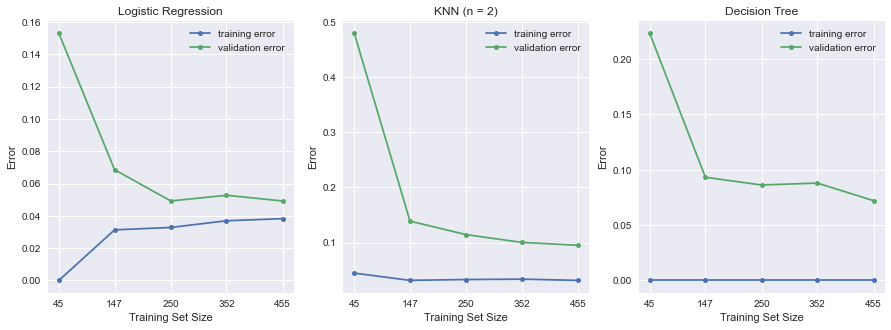

In [7]:
plt.style.use('seaborn')

f, ((ax11, ax12, ax13)) = plt.subplots(1, 3, figsize=(15,5))
X_axis = train_size
# Y_axis = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

ax11.set_xlabel('Training Set Size')
ax11.set_ylabel('Error')
ax11.set_xticks(X_axis)
# ax11.set_yticks(Y_axis)
ax11.set_title('Logistic Regression')
ax11.plot(X_axis, error_train_score_m_LR, 'o-', markersize=5, label="training error")
ax11.plot(X_axis, error_validation_score_m_LR, 'o-', markersize=5, label="validation error")
ax11.legend()

ax12.set_xlabel('Training Set Size')
ax12.set_ylabel('Error')
ax12.set_xticks(X_axis)
# ax12.set_yticks(Y_axis)
ax12.set_title('KNN (n = 2)')
ax12.plot(X_axis, error_train_score_m_KNN2, 'o-', markersize=5, label="training error")
ax12.plot(X_axis, error_validation_score_m_KNN2, 'o-', markersize=5, label="validation error")
ax12.legend()

ax13.set_xlabel('Training Set Size')
ax13.set_ylabel('Error')
ax13.set_title('Decision Tree')
ax13.set_xticks(X_axis)
# ax13.set_yticks(Y_axis)
ax13.plot(X_axis, error_train_score_m_DT, 'o-', markersize=5, label="training error")
ax13.plot(X_axis, error_validation_score_m_DT, 'o-', markersize=5, label="validation error")
ax13.legend()

plt.show()